In [2]:
import sys
sys.path.append('../..')
from models.condUNet import UNet_conditional
import torch

unet = UNet_conditional(
    c_in=1,
    c_out=1,
    img_size=8,
    volume_depth=8)

pos_encoded = unet.pos_encoding(torch.tensor([10]).cuda(),256)

/home/stud/npopkov/grandchallenges_vesuvius/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
print(pos_encoded.shape)

torch.Size([1, 256])


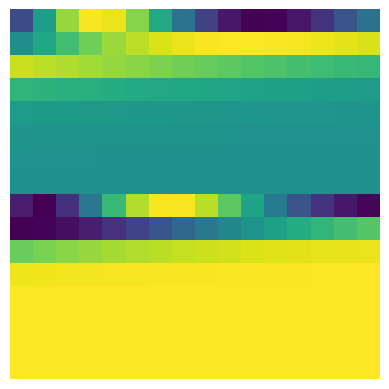

In [4]:
import matplotlib.pyplot as plt

plt.imshow(pos_encoded[0].view(16,16).cpu().detach().numpy(), cmap='viridis', interpolation='nearest')
plt.axis('off')
plt.show()

In [5]:
conv_res = unet.conv(torch.randn(1,8,8,8))
print(conv_res.shape)

torch.Size([1, 256])


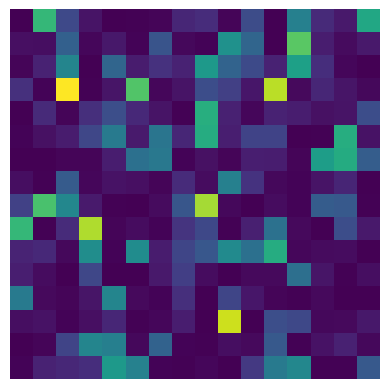

In [6]:
plt.imshow(conv_res[0].view(16,16).cpu().detach().numpy(), cmap='viridis', interpolation='nearest')
plt.axis('off')
plt.show()

In [9]:
def pos_encoding_show(t, channels):
        inv_freq = 1.0 / (
            10000
            ** (torch.arange(0, channels, 2).float() / channels)
        ).cuda()
        print(inv_freq.shape)
        plt.plot(inv_freq.cpu().detach().numpy())
        plt.title("Inverse Frequencies")
        plt.show()
        pos_enc_a = torch.sin(t.repeat(1, channels // 2) * inv_freq)
        print(pos_enc_a)
        plt.plot(pos_enc_a[0].cpu().detach().numpy())
        plt.title("Positional Encoding - Sine Component")
        plt.show()
        pos_enc_b = torch.cos(t.repeat(1, channels // 2) * inv_freq)
        print(pos_enc_b.shape)
        plt.plot(pos_enc_b[0].cpu().detach().numpy())
        plt.title("Positional Encoding - Cosine Component")
        plt.show()
        pos_enc = torch.cat([pos_enc_a, pos_enc_b], dim=-1)
        return pos_enc

torch.Size([128])


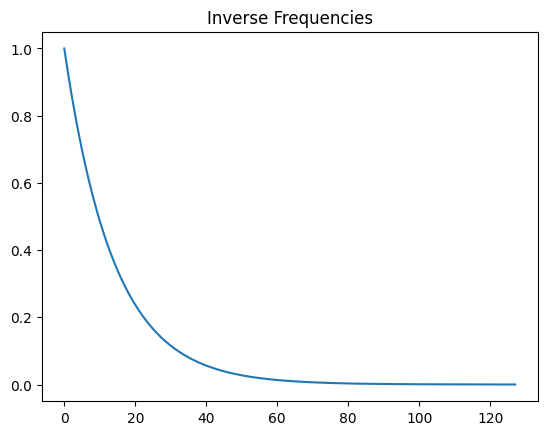

tensor([[-9.5892e-01, -9.9823e-01, -9.2771e-01, -7.7557e-01, -5.7113e-01,
         -3.4060e-01, -1.0512e-01,  1.1982e-01,  3.2394e-01,  5.0130e-01,
          6.4937e-01,  7.6806e-01,  8.5890e-01,  9.2441e-01,  9.6764e-01,
          9.9178e-01,  9.9995e-01,  9.9506e-01,  9.7975e-01,  9.5632e-01,
          9.2676e-01,  8.9273e-01,  8.5563e-01,  8.1659e-01,  7.7653e-01,
          7.3618e-01,  6.9611e-01,  6.5675e-01,  6.1844e-01,  5.8142e-01,
          5.4584e-01,  5.1182e-01,  4.7943e-01,  4.4868e-01,  4.1958e-01,
          3.9211e-01,  3.6622e-01,  3.4188e-01,  3.1902e-01,  2.9757e-01,
          2.7748e-01,  2.5867e-01,  2.4109e-01,  2.2465e-01,  2.0929e-01,
          1.9495e-01,  1.8157e-01,  1.6909e-01,  1.5746e-01,  1.4661e-01,
          1.3649e-01,  1.2707e-01,  1.1829e-01,  1.1011e-01,  1.0250e-01,
          9.5402e-02,  8.8797e-02,  8.2646e-02,  7.6920e-02,  7.1589e-02,
          6.6627e-02,  6.2007e-02,  5.7707e-02,  5.3705e-02,  4.9979e-02,
          4.6512e-02,  4.3285e-02,  4.

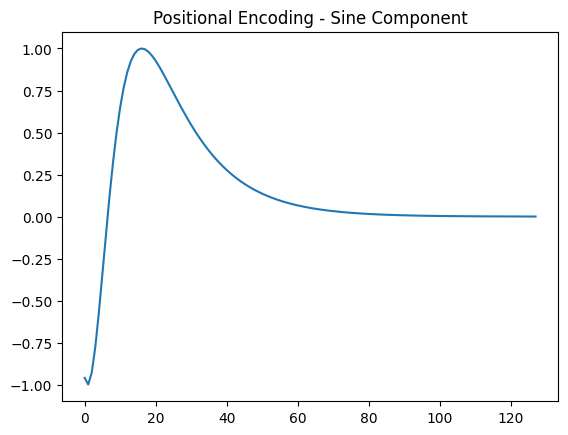

torch.Size([1, 128])


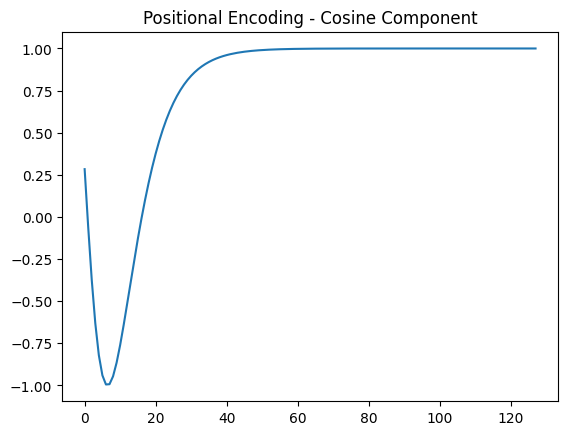

tensor([[-9.5892e-01, -9.9823e-01, -9.2771e-01, -7.7557e-01, -5.7113e-01,
         -3.4060e-01, -1.0512e-01,  1.1982e-01,  3.2394e-01,  5.0130e-01,
          6.4937e-01,  7.6806e-01,  8.5890e-01,  9.2441e-01,  9.6764e-01,
          9.9178e-01,  9.9995e-01,  9.9506e-01,  9.7975e-01,  9.5632e-01,
          9.2676e-01,  8.9273e-01,  8.5563e-01,  8.1659e-01,  7.7653e-01,
          7.3618e-01,  6.9611e-01,  6.5675e-01,  6.1844e-01,  5.8142e-01,
          5.4584e-01,  5.1182e-01,  4.7943e-01,  4.4868e-01,  4.1958e-01,
          3.9211e-01,  3.6622e-01,  3.4188e-01,  3.1902e-01,  2.9757e-01,
          2.7748e-01,  2.5867e-01,  2.4109e-01,  2.2465e-01,  2.0929e-01,
          1.9495e-01,  1.8157e-01,  1.6909e-01,  1.5746e-01,  1.4661e-01,
          1.3649e-01,  1.2707e-01,  1.1829e-01,  1.1011e-01,  1.0250e-01,
          9.5402e-02,  8.8797e-02,  8.2646e-02,  7.6920e-02,  7.1589e-02,
          6.6627e-02,  6.2007e-02,  5.7707e-02,  5.3705e-02,  4.9979e-02,
          4.6512e-02,  4.3285e-02,  4.

In [12]:
pos_encoding_show(torch.tensor([5]).cuda(),256)